In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [117]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/11/2021', end='1/23/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [118]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [159]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 50)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
# projection = [x - (math.log(x) * 1200 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[ 382762.92307692  401985.97802198  421209.03296703  440432.08791209
  459655.14285714  478878.1978022   498101.25274725  517324.30769231
  536547.36263736  555770.41758242  574993.47252747  594216.52747253
  613439.58241758  632662.63736264  651885.69230769  671108.74725275
  690331.8021978   709554.85714286  728777.91208791  748000.96703297
  767224.02197802  786447.07692308  805670.13186813  824893.18681319
  844116.24175824  863339.2967033   882562.35164835  901785.40659341
  921008.46153846  940231.51648352  959454.57142857  978677.62637363
  997900.68131868 1017123.73626374 1036346.79120879 1055569.84615385
 1074792.9010989  1094015.95604396 1113239.01098901 1132462.06593407
 1151685.12087912 1170908.17582418 1190131.23076923 1209354.28571429
 1228577.34065934 1247800.3956044  1267023.45054945 1286246.50549451
 1305469.56043956 1324692.61538462]


In [160]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [161]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                   daily    cumulative
date                                  
2021-01-25  3.827629e+05  5.468534e+06
2021-01-26  4.019860e+05  5.870520e+06
2021-01-27  4.212090e+05  6.291729e+06
2021-01-28  4.404321e+05  6.732161e+06
2021-01-29  4.596551e+05  7.191816e+06
2021-01-30  4.788782e+05  7.670694e+06
2021-01-31  4.981013e+05  8.168796e+06
2021-02-01  5.173243e+05  8.686120e+06
2021-02-02  5.365474e+05  9.222667e+06
2021-02-03  5.557704e+05  9.778438e+06
2021-02-04  5.749935e+05  1.035343e+07
2021-02-05  5.942165e+05  1.094765e+07
2021-02-06  6.134396e+05  1.156109e+07
2021-02-07  6.326626e+05  1.219375e+07
2021-02-08  6.518857e+05  1.284564e+07
2021-02-09  6.711087e+05  1.351674e+07
2021-02-10  6.903318e+05  1.420708e+07
2021-02-11  7.095549e+05  1.491663e+07
2021-02-12  7.287779e+05  1.564541e+07
2021-02-13  7.480010e+05  1.639341e+07
2021-02-14  7.672240e+05  1.716063e+07
2021-02-15  7.864471e+05  1.794708e+07
2021-02-16  8.056701e+05  1.875275e+07
2021-02-17  8.248932e+05 

In [162]:
complete = pd.concat([dataframe, result_df])
print(complete)


                   daily    cumulative
date                                  
2021-01-11  1.000000e+05  1.959151e+06
2021-01-12  1.211290e+05  2.080280e+06
2021-01-13  1.742760e+05  2.254556e+06
2021-01-14  2.398150e+05  2.494371e+06
2021-01-15  2.747930e+05  2.769164e+06
...                  ...           ...
2021-03-11  1.247800e+06  4.258873e+07
2021-03-12  1.267023e+06  4.385575e+07
2021-03-13  1.286247e+06  4.514200e+07
2021-03-14  1.305470e+06  4.644747e+07
2021-03-15  1.324693e+06  4.777216e+07

[63 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

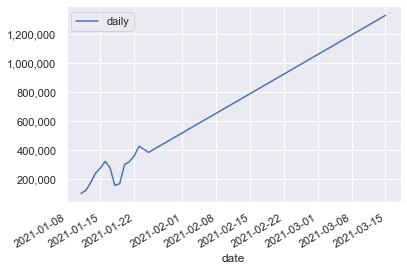

<Figure size 432x288 with 0 Axes>

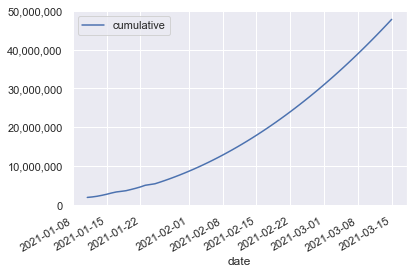

In [163]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

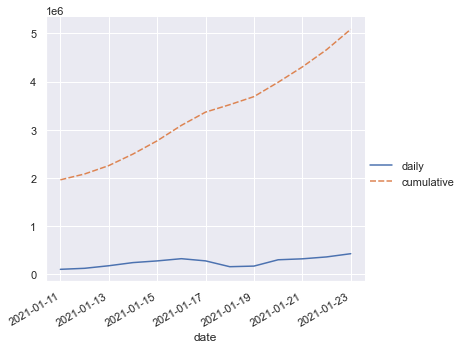

In [141]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
